In [1]:
# Import datasets
from sklearn import datasets
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
digits = datasets.load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits['data'].shape

(1797, 64)

In [6]:
digits['images'].shape

(1797, 8, 8)

In [7]:
digits['target'].shape

(1797,)

In [8]:
import pandas as pd

df = {
    'data': [' '.join(list(map(str, d))) for d in digits['data']],
    'target': digits['target']
}
df = pd.DataFrame(df)

In [9]:
df.head()

,data,target
0,0.0 0.0 5.0 13.0 9.0 1.0 0.0 0.0 0.0 0.0 13.0 ...,0
1,0.0 0.0 0.0 12.0 13.0 5.0 0.0 0.0 0.0 0.0 0.0 ...,1
2,0.0 0.0 0.0 4.0 15.0 12.0 0.0 0.0 0.0 0.0 3.0 ...,2
3,0.0 0.0 7.0 15.0 13.0 1.0 0.0 0.0 0.0 8.0 13.0...,3
4,0.0 0.0 0.0 1.0 11.0 0.0 0.0 0.0 0.0 0.0 0.0 7...,4


In [10]:
max_val = 0
for i in range(len(df)):
    max_val = max(max_val, digits['images'][i].max())
print(max_val)

16.0


In [11]:
num_classes = df['target'].value_counts()

print(num_classes.mean(), num_classes.min(), num_classes.max())

179.7 174 183


<BarContainer object of 10 artists>

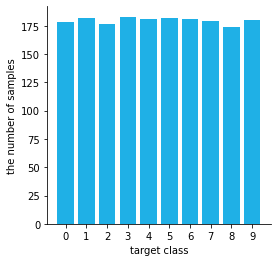

In [12]:
# plotting data distributions
X = list(range(0, 10))
Y = [num_classes[i] for i in X]

plt.figure(figsize=(4, 4))
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(X)
ax.set_xlabel('target class')
ax.set_ylabel('the number of samples')
ax.bar(X, Y, color='#1FB0E6')


In [13]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [14]:
min_val = np.inf
max_val = -np.inf

for i in range(len(digits.images)):
    min_val = min(min_val, digits.images[i].min())
    max_val = max(max_val, digits.images[i].max())
    
print(min_val, max_val)

0.0 16.0


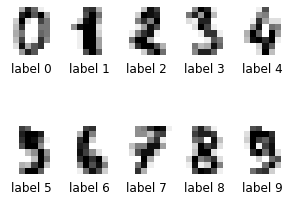

In [15]:
_, axes = plt.subplots(nrows=2,ncols=5, figsize=(5, 4))

for j in range(2):
    for i in range(5):
        ax = axes[j, i]
        
        ax.set_axis_off()
        ax.imshow(digits.images[i + j * 5], cmap=plt.cm.gray_r)
        ax.set_title('label %i' % digits.target[i + j * 5], y=-0.5)

<AxesSubplot:>

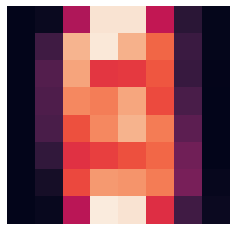

In [16]:
plt.figure(figsize=(4, 4))
ax = plt.subplot()
ax.set_axis_off()
sns.heatmap((digits.images).mean(axis=0), cbar=False)

In [17]:
data_per_cls = { k: [] for k in range(10) }
for img, tgt in zip(digits.images, digits.target):
    data_per_cls[tgt].append(img)

In [18]:
val_data_per_cls = 20

val_data = {
    'images': [],
    'targets': []
}

train_data = {
    'images': [],
    'targets': []
}

for cls in range(10):
    val_data['images'] += data_per_cls[cls][:val_data_per_cls]
    val_data['targets'] += [cls] * val_data_per_cls
    train_data['images'] += data_per_cls[cls][val_data_per_cls:]
    train_data['targets'] += [cls] * (len(data_per_cls[cls]) - val_data_per_cls)
    
val_data['images'] = np.array(val_data['images'])
val_data['targets'] = np.array(val_data['targets'])
train_data['images'] = np.array(train_data['images'])
train_data['targets'] = np.array(train_data['targets'])

In [19]:
import pickle

with open('train.pkl', 'wb') as f:
    pickle.dump(train_data, f)
    
with open('validation.pkl', 'wb') as f:
    pickle.dump(val_data, f)